In [1]:
import pandas as pd
import numpy as np

## all all the data 

In [2]:
all_data = pd.read_csv('./case_data.csv')

In [3]:
all_data.head()  # 

employee_key     employee_name  \
0  98DA521E-1A37-EA11-A813-000D3A31C4C1||DYNAMIC_...         Sahil Ali   
1  0FDC6263-ECCC-EB11-8235-00224806DC79||DYNAMIC_...      Yashika Jain   
2  98DA521E-1A37-EA11-A813-000D3A31C4C1||DYNAMIC_...         Sahil Ali   
3  8E02B3A7-147C-E911-A86B-000D3A37285E||DYNAMIC_...  Muskan Bharadwaj   
4  B3992A73-FEC9-E911-A86C-000D3A3722D6||DYNAMIC_...      Keerti Arora   

              agent_path skill_category    first_queue             last_queue  \
0       UNKNOWN->UNKNOWN      Retention  JC-BOT-SKILL2        RET-Eng-CCI-Msg   
1       UNKNOWN->UNKNOWN             CS  JC-BOT-SKILL2         CCI-Eng-CS-Msg   
2       UNKNOWN->UNKNOWN      Retention  JC-BOT-SKILL2        RET-Eng-CCI-Msg   
3       UNKNOWN->UNKNOWN             CS  JC-BOT-SKILL2         CCI-Eng-CS-Msg   
4  UNKNOWN->Keerti Arora             CS   JC-BOT-SKILL  CCI-Eng-CSBilling-Msg   

   workday_id  bot_involved_flag           case_key  \
0         NaN                  2  ADB-22654395-X7R8   
1         NaN                  2  ADB-22656450-V4V4   
2         NaN                  2  ADB-22655351-T7Q0   
3         NaN                  2  ADB-23237663-T8P6   
4    247672.0                  2  ADB-23944204-S9K4   

            incidentlevel2reason  ... no_of_agents  agent_tenure_days  \
0      Not using products enough  ...            2                724   
1      Subscription Status Check  ...            2                220   
2      Not using products enough  ...            2                724   
3      Subscription Status Check  ...            2                909   
4  Payment Update for Individual  ...            2                961   

   resolution_days  customer_tenure_days  csatscore  cesscore  \
0                0                   NaN        NaN       NaN   
1                0                   NaN        NaN       NaN   
2                0                   NaN        5.0       5.0   
3                0                   NaN        NaN       NaN   
4                0                   NaN        NaN       NaN   

   agentsatisfactionscore  fcrscore  fiscal_qtr  \
0                     NaN       NaN     2022-Q1   
1                     NaN       NaN     2022-Q1   
2                     NaN       1.0     2022-Q1   
3                     NaN       NaN     2022-Q1   
4                     NaN       NaN     2022-Q2   

                                    new_employee_key  
0  98DA521E-1A37-EA11-A813-000D3A31C4C1||DYNAMIC_CRM  
1  0FDC6263-ECCC-EB11-8235-00224806DC79||DYNAMIC_CRM  
2  98DA521E-1A37-EA11-A813-000D3A31C4C1||DYNAMIC_CRM  
3  8E02B3A7-147C-E911-A86B-000D3A37285E||DYNAMIC_CRM  
4  B3992A73-FEC9-E911-A86C-000D3A3722D6||DYNAMIC_CRM  

[5 rows x 29 columns]

In [4]:
def check_string(string):
    lis = string.split('||')
    new = '||'.join(lis[:-1])
    return (new)
# check_string('40BA0A16-52E1-E911-A870-000D3A3722D6||DYNAMIC_CRM||2021-04-22')

In [5]:
    
all_data['new_employee_key'] = all_data.employee_key.map(check_string)

In [6]:
# all_data['new_employee_key'].unique()

In [7]:
# all_data[all_data.fiscal_qtr.isin(['2021-Q3', '2021-Q4'])].case_key.nunique()

# all_data.employee_key.nunique()  # 19039

In [8]:
# 
# # .agg({'Item':'size','shop1':['sum','mean','std'],'shop2':['sum','mean','std'],'shop3':['sum','mean','std']})
# import pandas as pd
# # data['csatscore'] = data['csatscore'].astype(int)
# all_new_X = pd.DataFrame(all_data.groupby(['employee_name', 'incidentlevel2reason']).agg({'wait_time':'mean',
#                                                              'avg_response_agnt': 'mean', 'agent_handle_time': 'mean',
#                                                              'no_of_turns_per_conversation': 'mean', 'agent_tenure_days':'max',
                                                             
#                                                             }))

In [9]:
# all_new_X

In [10]:
# score = scorecard.score(all_new_X)

## agent data

In [11]:
agent_data = pd.read_csv('./agent_data.csv')

In [12]:
# fillna
agent_data['latest_employee_key'] = agent_data['latest_employee_key'].fillna(agent_data['employee_key'])

agent_data['day'] = agent_data['day'].fillna(agent_data['Date'])


In [13]:
agent_data.number_cases = agent_data.number_cases.astype(float)
agent_data.day_billable_hour = agent_data.day_billable_hour.astype(float)
agent_data['CPH'] = agent_data.number_cases / agent_data.day_billable_hour 

In [14]:
# agent_data[agent_data['CPH'] == 0]  # nope, only could be nan, then nan will not be calculated into mean

In [15]:
# agent_data[agent_data['day_billable_hour'] == 0]   
# # how to handle this? the day_billable hour is 0, but they handle cases


In [16]:
agent_data.replace([np.inf], np.nan, inplace=True) 
agent_data = agent_data[agent_data.CPH <= 10]

In [17]:
# agent_data.CPH.mean()  
# agent_data[agent_data.latest_employee_key == '0DD1B3CD-61D1-E811-817E-E0071B715CF1||DYNAMIC_CRM||2019-07-16']
# # DELETE these outliners

In [18]:
#agent_data['new_employee_key'] = agent_data.latest_employee_key.map(check_string)

In [19]:
agent_data.day_working_hours = agent_data.day_working_hours.astype(float)
agent_data.day_billable_hour = agent_data.day_billable_hour.astype(float)
agent_data.CPH = agent_data.CPH.astype(float)
agent = pd.DataFrame(agent_data.groupby('new_employee_key').agg({'day_working_hours':'median',
                                                             'day_billable_hour': 'median', 'CPH': np.nanmedian,
                                                                   'number_cases': 'sum'})).reset_index()


In [20]:
agent.to_excel('agent_CPH_new_key.xlsx')
agent.shape  # 5557

(5556, 5)

In [21]:
agent = pd.read_excel('agent_CPH_new_key.xlsx')

In [22]:
agent.columns

Index(['Unnamed: 0', 'new_employee_key', 'day_working_hours',
       'day_billable_hour', 'CPH', 'number_cases'],
      dtype='object')

In [23]:
agent.head()

Unnamed: 0   new_employee_key  day_working_hours  day_billable_hour  \
0           0  00014578||WORKDAY             12.285             11.840   
1           1  00015050||WORKDAY              6.160              5.980   
2           2  00029586||WORKDAY              9.020              7.770   
3           3  00037014||WORKDAY              8.425              8.260   
4           4  00037511||WORKDAY              8.465              7.765   

        CPH  number_cases  
0  0.084739             4  
1  0.167224             1  
2  0.134228             9  
3  0.121350             2  
4  0.129947             4

## chs table

In [24]:
# # chs table 
# import pandas as pd

# query = """
# select case_key, pred_score, model_prob from ce_analytics.fact_chs_data

# """

In [25]:
#chs = connection.read_sql(query = query, conn = conn)
chs = pd.read_csv('./chs_data_new.csv')

In [26]:
chs.head()

case_key  pred_score  model_prob
0  ADB-21246611-N5L0           0    0.220915
1  ADB-21246612-B4P6           1    0.709206
2  ADB-21246617-Y4Y8           1    0.690766
3  ADB-21246618-J0C9           0    0.265875
4  ADB-21246619-Q7J4           1    0.753226

In [27]:
chs.case_key.nunique()  # 90456 take into consideration 
chs.shape
chs = chs.drop_duplicates()

In [28]:
chs.shape  # 2580811

(2580811, 3)

In [29]:
all_data_new = pd.merge(left = all_data, right = chs[['case_key', 'pred_score', 'model_prob']], on = 'case_key')
all_data_new.head()  # 2823621


employee_key     employee_name  \
0  2B0DF55E-191A-EC11-B6E6-000D3A304A3D||DYNAMIC_...      Sakshi Singh   
1  A74C24AB-5856-EB11-BB23-000D3A31C6E9||DYNAMIC_...  KEERTHANA MARY A   
2  42F42156-97BF-EA11-A812-000D3A31CF04||DYNAMIC_...      Jalaj Hasija   
3  7F0CBEBF-1C87-E911-A864-000D3A372A3A||DYNAMIC_...       Kajal Bisht   
4  64EB7F02-B5E4-EB11-BACB-000D3A5ACBD5||DYNAMIC_...     Siva Anbarasu   

                  agent_path skill_category        first_queue  \
0           UNKNOWN->UNKNOWN             CS      JC-BOT-SKILL2   
1           UNKNOWN->UNKNOWN             CS       JC-BOT-SKILL   
2           UNKNOWN->UNKNOWN      Retention       JC-BOT-SKILL   
3  UNKNOWN->UNKNOWN->UNKNOWN      Retention      JC-BOT-SKILL2   
4           UNKNOWN->UNKNOWN      Retention  SLS-CCI-EngUS-Msg   

        last_queue  workday_id  bot_involved_flag           case_key  \
0   CCT-Eng-CS-Msg         NaN                  2  ADB-22488541-R7V4   
1   CCI-Eng-CS-Msg         NaN                  2  ADB-22497559-F5D8   
2  RET-Eng-CCI-Msg         NaN                  2  ADB-22485168-R7V0   
3  RET-Eng-CCI-Msg    244291.0                  2  ADB-22489669-R7V4   
4  RET-Eng-CCI-Msg         NaN                  3  ADB-22499217-M5T5   

                                incidentlevel2reason  ... resolution_days  \
0                          Update Name/Phone/Address  ...               0   
1                          Subscription Status Check  ...               5   
2                                              Other  ...               3   
3                          Not using products enough  ...               0   
4  Getting from other source (work, school, compl...  ...               0   

   customer_tenure_days  csatscore  cesscore  agentsatisfactionscore  \
0                   NaN        NaN       NaN                     NaN   
1                   NaN        NaN       NaN                     NaN   
2                   NaN        NaN       NaN                     NaN   
3                   NaN        NaN       NaN                     NaN   
4                   NaN        NaN       NaN                     NaN   

   fcrscore  fiscal_qtr                                   new_employee_key  \
0       NaN     2022-Q1  2B0DF55E-191A-EC11-B6E6-000D3A304A3D||DYNAMIC_CRM   
1       NaN     2022-Q1  A74C24AB-5856-EB11-BB23-000D3A31C6E9||DYNAMIC_CRM   
2       NaN     2022-Q1  42F42156-97BF-EA11-A812-000D3A31CF04||DYNAMIC_CRM   
3       NaN     2022-Q1  7F0CBEBF-1C87-E911-A864-000D3A372A3A||DYNAMIC_CRM   
4       NaN     2022-Q1  64EB7F02-B5E4-EB11-BACB-000D3A5ACBD5||DYNAMIC_CRM   

   pred_score  model_prob  
0           1    0.698668  
1           1    0.621988  
2           1    0.665362  
3           0    0.059942  
4           1    0.751229  

[5 rows x 31 columns]

In [30]:

case_number = pd.DataFrame(all_data_new.groupby(['employee_name','incidentlevel2reason']).case_key.count()).reset_index().rename(columns = {'case_key':'counting'})




In [31]:
case_number

all_data_new = pd.merge(left = all_data_new, right = case_number, on = ['employee_name', 'incidentlevel2reason'])


In [32]:
all_data_new = pd.merge(left = all_data_new, right = agent[['new_employee_key', 'day_working_hours', 'day_billable_hour', 'CPH', 'number_cases']]
                       ,left_on = 'new_employee_key', right_on = 'new_employee_key')



In [33]:
all_data_new.shape

(2791629, 36)

In [34]:
all_data_new.case_key.nunique() # 2544760

2544837

In [35]:
all_data_new = all_data_new.drop_duplicates()

In [36]:
all_data_new.head()
all_data_new.columns

Index(['employee_key', 'employee_name', 'agent_path', 'skill_category',
       'first_queue', 'last_queue', 'workday_id', 'bot_involved_flag',
       'case_key', 'incidentlevel2reason', 'sub_line_of_business__c',
       'wait_time', 'complete_duration', 'avg_response_cust',
       'avg_response_agnt', 'agent_handle_time', 'close_time',
       'no_of_upfront_sla_breach', 'no_of_turns_per_conversation',
       'no_of_agents', 'agent_tenure_days', 'resolution_days',
       'customer_tenure_days', 'csatscore', 'cesscore',
       'agentsatisfactionscore', 'fcrscore', 'fiscal_qtr', 'new_employee_key',
       'pred_score', 'model_prob', 'counting', 'day_working_hours',
       'day_billable_hour', 'CPH', 'number_cases'],
      dtype='object')

In [37]:
all_data_new.to_csv('demo.csv')

### clean data

In [38]:
# all_data_new.to_csv('demo.csv')

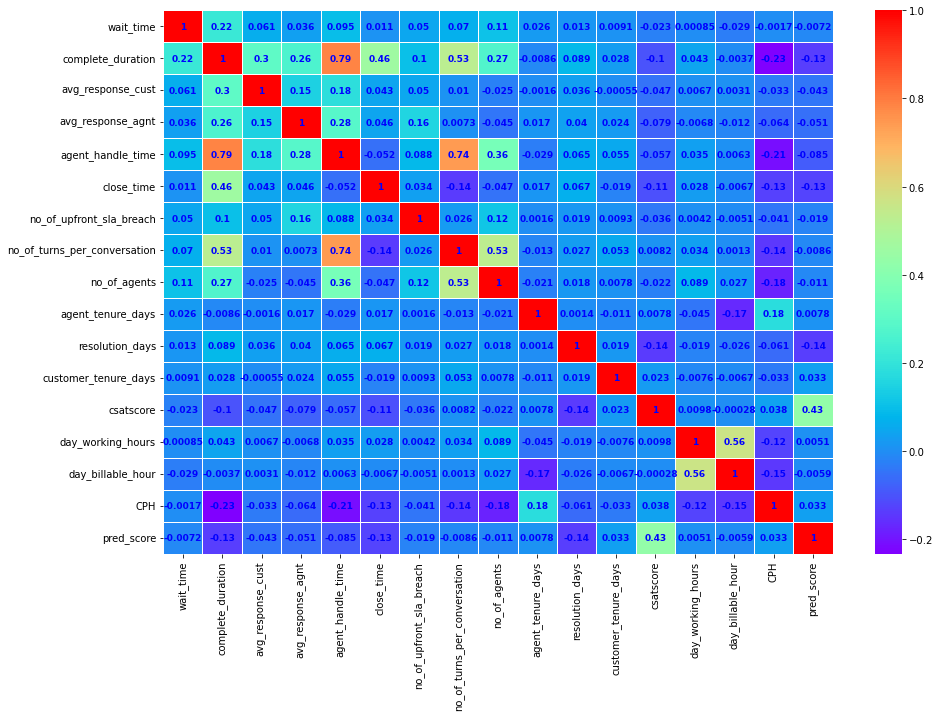

In [39]:
corr = all_data_new[['wait_time', 'complete_duration',
       'avg_response_cust', 'avg_response_agnt', 'agent_handle_time',
       'close_time', 'no_of_upfront_sla_breach',
       'no_of_turns_per_conversation', 'no_of_agents', 'agent_tenure_days',
       'resolution_days', 'customer_tenure_days', 'csatscore', 'day_working_hours', 'day_billable_hour', 'CPH', 'pred_score']].corr()

import seaborn as sns
import matplotlib.pyplot as plt
# corr = new_data.corr()#
xticks = list(corr.index)
yticks = list(corr.index)
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(1, 1, 1)
sns.heatmap(corr, annot=True, cmap="rainbow",ax=ax1,linewidths=.5, annot_kws={'size': 9, 'weight': 'bold', 'color': 'blue'})
ax1.set_xticklabels(xticks, rotation=90, fontsize=10)
ax1.set_yticklabels(yticks, rotation=0, fontsize=10)
plt.show()


In [40]:
# import pandas as pd
# all_data_new = pd.read_excel('all_data_new.xlsx')

In [41]:
# check na
all_data_new.isna().sum()
# delete incidentlevel2reason na part
all_data_new = all_data_new.dropna(subset = ['incidentlevel2reason'])

In [42]:
all_data_new.head()
all_data_new.columns

Index(['employee_key', 'employee_name', 'agent_path', 'skill_category',
       'first_queue', 'last_queue', 'workday_id', 'bot_involved_flag',
       'case_key', 'incidentlevel2reason', 'sub_line_of_business__c',
       'wait_time', 'complete_duration', 'avg_response_cust',
       'avg_response_agnt', 'agent_handle_time', 'close_time',
       'no_of_upfront_sla_breach', 'no_of_turns_per_conversation',
       'no_of_agents', 'agent_tenure_days', 'resolution_days',
       'customer_tenure_days', 'csatscore', 'cesscore',
       'agentsatisfactionscore', 'fcrscore', 'fiscal_qtr', 'new_employee_key',
       'pred_score', 'model_prob', 'counting', 'day_working_hours',
       'day_billable_hour', 'CPH', 'number_cases'],
      dtype='object')

## ab test

In [43]:
all_data_new.columns

Index(['employee_key', 'employee_name', 'agent_path', 'skill_category',
       'first_queue', 'last_queue', 'workday_id', 'bot_involved_flag',
       'case_key', 'incidentlevel2reason', 'sub_line_of_business__c',
       'wait_time', 'complete_duration', 'avg_response_cust',
       'avg_response_agnt', 'agent_handle_time', 'close_time',
       'no_of_upfront_sla_breach', 'no_of_turns_per_conversation',
       'no_of_agents', 'agent_tenure_days', 'resolution_days',
       'customer_tenure_days', 'csatscore', 'cesscore',
       'agentsatisfactionscore', 'fcrscore', 'fiscal_qtr', 'new_employee_key',
       'pred_score', 'model_prob', 'counting', 'day_working_hours',
       'day_billable_hour', 'CPH', 'number_cases'],
      dtype='object')

In [44]:
from scipy.stats import ttest_ind
import scipy.stats as stats


ab_test_list = ['wait_time',
       'complete_duration', 'avg_response_cust', 'avg_response_agnt',
       'agent_handle_time', 'close_time', 'no_of_upfront_sla_breach',
       'no_of_turns_per_conversation', 'no_of_agents', 'agent_tenure_days',
       'resolution_days', 'customer_tenure_days', 'csatscore', 
       'day_working_hours', 'day_billable_hour', 'CPH']

for check_attribute in ab_test_list:
    
    if check_attribute in ['no_of_agents', 'csatscore']:
        print ("======"+ check_attribute + " crosstab and ab test===========")
        print (pd.crosstab(all_data_new['pred_score'], all_data_new[check_attribute]))
        # multi proportion test
        print ('multi proportion test')
        print (stats.chi2_contingency(pd.crosstab(all_data_new['pred_score'], all_data_new[check_attribute])))
        
        
    else: 
        print ("======"+ check_attribute + " mean and ab test===========")
        print (all_data_new.groupby('pred_score')[check_attribute].mean())
        print (ttest_ind(
            all_data_new.dropna(subset = [check_attribute]).loc[all_data_new['pred_score'] == 0, check_attribute], 
            all_data_new.dropna(subset = [check_attribute]).loc[all_data_new['pred_score'] == 1, check_attribute],equal_var=True
        ) )


======wait_time mean and ab test===========
pred_score
0    45.794290
1    42.085117
Name: wait_time, dtype: float64
Ttest_indResult(statistic=12.048702345004004, pvalue=1.9740458711469507e-33)
======complete_duration mean and ab test===========
pred_score
0    2619.235625
1    2068.261997
Name: complete_duration, dtype: float64
Ttest_indResult(statistic=226.69703297406326, pvalue=0.0)
======avg_response_cust mean and ab test===========
pred_score
0    65.315396
1    58.464236
Name: avg_response_cust, dtype: float64
Ttest_indResult(statistic=71.5899175138563, pvalue=0.0)
======avg_response_agnt mean and ab test===========
pred_score
0    62.953157
1    54.084780
Name: avg_response_agnt, dtype: float64
Ttest_indResult(statistic=85.6542454160462, pvalue=0.0)
======agent_handle_time mean and ab test===========
pred_score
0    1657.461537
1    1401.084107
Name: agent_handle_time, dtype: float64
Ttest_indResult(statistic=142.16404194183818, pvalue=0.0)
======close_time mean and ab test=====

In [45]:

no_agents = pd.crosstab(all_data_new['pred_score'], all_data_new['no_of_agents'])
no_agents.to_excel('agent_number.xlsx')

In [46]:
import seaborn as sns

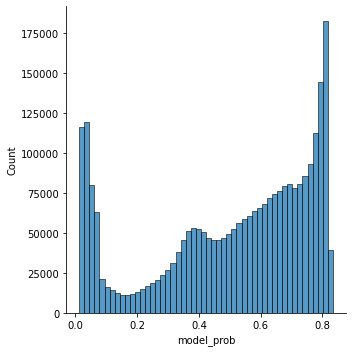

In [47]:

sns.displot(all_data_new, x="model_prob", bins=50)

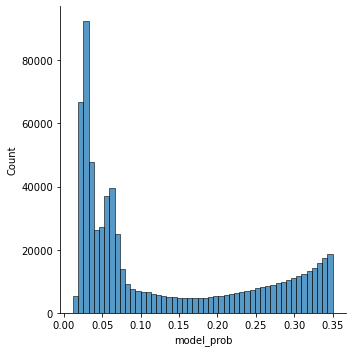

In [48]:

sns.displot(all_data_new[all_data_new.pred_score == 0], x="model_prob", bins=50)  # < 0.2

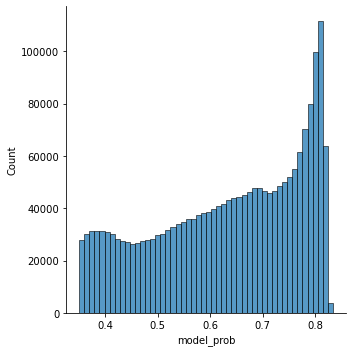

In [49]:
sns.displot(all_data_new[all_data_new.pred_score == 1], x="model_prob", bins=50)  # > 0.7

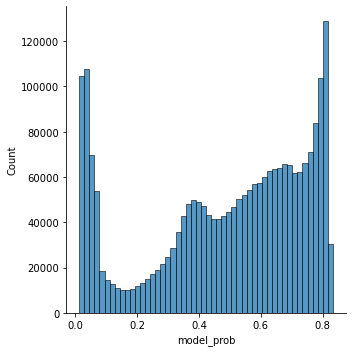

In [50]:
sns.displot(all_data_new[all_data_new.csatscore.isna()], x="model_prob", bins=50)

In [51]:
import pandas as pd
all_data_new = pd.read_csv('demo.csv')

In [52]:
# all_data_new.head()

## modeling

In [53]:
# build a new chs score
def new_chs(score):
    if score <= 0.35:
        return (0)
    if score > 0.35 and score < 0.7:
        return (1)
    
    if score >= 0.7:
        return (2)

all_data_new['chs'] = all_data_new.model_prob.map(new_chs)

In [54]:
all_data_new['chs'].value_counts()  # 直接不要中间的case

1    1258502
2     827520
0     705607
Name: chs, dtype: int64

In [55]:
### for score only
all_data_new.columns

Index(['Unnamed: 0', 'employee_key', 'employee_name', 'agent_path',
       'skill_category', 'first_queue', 'last_queue', 'workday_id',
       'bot_involved_flag', 'case_key', 'incidentlevel2reason',
       'sub_line_of_business__c', 'wait_time', 'complete_duration',
       'avg_response_cust', 'avg_response_agnt', 'agent_handle_time',
       'close_time', 'no_of_upfront_sla_breach',
       'no_of_turns_per_conversation', 'no_of_agents', 'agent_tenure_days',
       'resolution_days', 'customer_tenure_days', 'csatscore', 'cesscore',
       'agentsatisfactionscore', 'fcrscore', 'fiscal_qtr', 'new_employee_key',
       'pred_score', 'model_prob', 'counting', 'day_working_hours',
       'day_billable_hour', 'CPH', 'number_cases', 'chs'],
      dtype='object')

In [56]:
all_data_new_df = all_data_new[all_data_new.chs != 1]

In [57]:
all_data_new_df['pred_score'].value_counts() # done

1    827520
0    705607
Name: pred_score, dtype: int64

In [58]:
import pandas as pd
from optbinning import Scorecard, BinningProcess
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Load the train dataset
df_all_data_new = all_data_new_df[['employee_name',
                                   
                                   'incidentlevel2reason', 'sub_line_of_business__c',
       'wait_time', 'complete_duration', 'avg_response_cust',
       'avg_response_agnt', 'agent_handle_time', 'close_time',
       'no_of_upfront_sla_breach', 'no_of_turns_per_conversation',
       'no_of_agents', 'agent_tenure_days', 'resolution_days', 'customer_tenure_days', 'csatscore', 'day_working_hours',
       'day_billable_hour', 'CPH', 'pred_score', ]]
df_all_data_new.csatscore = df_all_data_new.csatscore.astype(float)
# df_all_data_new.agentsatisfactionscore = df_all_data_new.agentsatisfactionscore.astype(float)
# df_all_data_new.fcrscore = df_all_data_new.fcrscore.astype(float)
# df_all_data_new.cesscore = df_all_data_new.cesscore.astype(float)
##additional columns added
#'skill_category','first_queue', 'last_queue', 'bot_involved_flag','counting', 'number_cases'


/Users/tek88627/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [59]:
df_all_data_new.pred_score.value_counts()

1    827520
0    705607
Name: pred_score, dtype: int64

In [60]:
X = df_all_data_new.loc[:, df_all_data_new.columns != 'pred_score']
y = df_all_data_new['pred_score']


In [61]:
y.value_counts()

1    827520
0    705607
Name: pred_score, dtype: int64

In [62]:
# # feature importance 
# from sklearn.ensemble import RandomForestClassifier

# forest = RandomForestClassifier(random_state=0)
# forest.fit(X, y)

In [63]:
#X = df_all_data_new.loc[:, df_all_data_new.columns != 'chs']
#y = df_all_data_new['chs']

X = df_all_data_new.loc[:, df_all_data_new.columns != 'pred_score']
y = df_all_data_new['pred_score']

# Split the dataset into train and test
df_application_train, df_application_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42)

In [64]:
# Define the feature list from dataset (including categorical and numerical)
list_features = df_application_train.columns.values

# Define categorical features list
list_categorical = df_application_train.select_dtypes(include=['object', 'category']).columns.values

# Define selection criteria for BinningProcess
selection_criteria = {"iv": {"min": 0.005, 'max':0.5, "strategy": "highest"}}

# # Instatiate BinningProcess
# binning_process = BinningProcess(
#     categorical_variables=list_categorical,
#     variable_names=list_features,
#     selection_criteria=selection_criteria,
# )

In [65]:
list_categorical  # done

array(['employee_name', 'incidentlevel2reason', 'sub_line_of_business__c'],
      dtype=object)

In [66]:
logreg = LogisticRegression(C=5, max_iter=5000, random_state=161)
# from sklearn.ensemble import RandomForestClassifier
# randomforest = RandomForestClassifier(500)

In [67]:
logreg

LogisticRegression(C=5, max_iter=5000, random_state=161)

In [68]:
# Define scaling method and values
import numpy as np
scaling_method = "min_max"
scaling_method_data = {"min": 0, "max": 100}
variable_names = np.array(X.columns)
# Instatiate and fit Scorecard
scorecard = Scorecard(
    binning_process= BinningProcess(variable_names),
    estimator=logreg,
    scaling_method="min_max",
     scaling_method_params={"min": 0, "max": 100},
    reverse_scorecard=True)





In [69]:
scorecard.fit(df_application_train, list(y_train)) 


Scorecard(binning_process=BinningProcess(variable_names=array(['employee_name', 'incidentlevel2reason', 'sub_line_of_business__c',
       'wait_time', 'complete_duration', 'avg_response_cust',
       'avg_response_agnt', 'agent_handle_time', 'close_time',
       'no_of_upfront_sla_breach', 'no_of_turns_per_conversation',
       'no_of_agents', 'agent_tenure_days', 'resolution_days',
       'customer_tenure_days', 'csatscore', 'day_working_hours',
       'day_billable_hour', 'CPH'], dtype=object)),
          estimator=LogisticRegression(C=5, max_iter=5000, random_state=161),
          reverse_scorecard=True, scaling_method='min_max',
          scaling_method_params={'max': 100, 'min': 0})

In [70]:
# ### Create a Pickle file using serialization
# import pickle
# pickle_out = open("logistic-regression.pkl","wb")
# pickle.dump(scorecard, pickle_out)
# pickle_out.close()

In [71]:
#scorecard

In [72]:
scorecard.table(style="summary")

Variable                                                Bin    Points
0   employee_name  [Vikas Pathak, Aniket Bose, Mohit Bisht, Mohd.... -0.344444
1   employee_name  [Riya Verma, Vikalp Mathpal, Radhika Akar, Dip...  1.176781
2   employee_name  [Ashwin Jasper Sahai, Ameena Banu, Shubham Tya...  1.772851
3   employee_name  [AMANDEEP KAUR, Fleming Mangalasseril, Nikhil ...  2.211312
4   employee_name  [Gaurav Narang, Arpita Roy, GANESH N S, Charvi...  2.554567
..            ...                                                ...       ...
5             CPH                                       [2.45, 2.72)  2.476281
6             CPH                                       [2.72, 3.22)  1.880025
7             CPH                                        [3.22, inf)  1.770199
8             CPH                                            Special  3.374567
9             CPH                                            Missing  3.374567

[210 rows x 3 columns]

/Users/tek88627/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


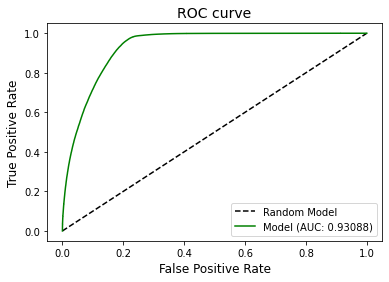

In [73]:
from optbinning.scorecard.plots import plot_ks, plot_auc_roc
# y_test
# Assign score and predicted probability to test dataset
df_application_test.loc[:,"score"] = scorecard.score(df_application_test)

# ROC-AUC plot
plot_auc_roc(y_test, df_application_test.score)  # done

In [74]:
# scorecard.predict_proba(X)

In [75]:
# # check accuracy
# from sklearn.metrics import confusion_matrix
# y_true = y_test
# y_pred = scorecard.predict(df_application_test)
# confusion_matrix(y_true, y_pred)

In [76]:
# scorecard.predict_proba(X)

In [77]:
# # check accuracy
# from sklearn.metrics import confusion_matrix
# y_true = y_test
# y_pred = scorecard.predict(df_application_test)
# confusion_matrix(y_true, y_pred)

In [78]:
X['score'] = scorecard.score(X)


In [79]:
X['pred_score'] = y

In [80]:
#X

In [81]:
scorecard.table(style="detailed").to_excel('score_detail.xlsx')

In [82]:
final_score = pd.DataFrame(X.groupby(['employee_name','sub_line_of_business__c', 'incidentlevel2reason']).agg({'score':'mean', 'pred_score': 'count'})).reset_index()

final_score = final_score.rename(columns = {'pred_score': 'count'})


In [83]:
final_score

employee_name    sub_line_of_business__c  \
0       ABHILASH V KUMAR  Consumer Customer Service   
1       ABHILASH V KUMAR  Consumer Customer Service   
2       ABHILASH V KUMAR  Consumer Customer Service   
3       ABHILASH V KUMAR  Consumer Customer Service   
4       ABHILASH V KUMAR  Consumer Customer Service   
...                  ...                        ...   
111158    vinay Malhotra         Consumer Universal   
111159    vinay Malhotra         Consumer Universal   
111160    vinay Malhotra         Consumer Universal   
111161    vinay Malhotra         Consumer Universal   
111162    vinay Malhotra         Consumer Universal   

                       incidentlevel2reason      score  count  
0                     Able to locate charge  24.466776      1  
1                     Change Adobe ID Email  71.057464      7  
2                            Change Country  75.510143      4  
3                Change/Switch Subscription  80.904145     41  
4                     Delete Payment Method  64.088924      2  
...                                     ...        ...    ...  
111158            Subscription Status Check  31.896333      1  
111159                     Unable to Launch  20.918001      1  
111160         Unable to Reach Adobe Server  43.315008      3  
111161  Unexpected Trial Mode/Buy now Error  40.948270      4  
111162               Workflow Related Query  56.158099      3  

[111163 rows x 5 columns]

## verification - satisfaction rate


In [84]:
# final_score_new['RANK'] = final_score_new.groupby(['sub_line_of_business__c'])['score'].rank(ascending=False)

In [85]:
# final_score_new[final_score_new['RANK'] ==1]
# final_score[final_score['RANK'] ==1]


In [86]:
count_numbers = all_data_new[['incidentlevel2reason','employee_name']].drop_duplicates()
final = pd.merge(left = final_score, right = count_numbers, on = ['incidentlevel2reason','employee_name'])

In [87]:
final = final.rename(columns = {'count': 'number_of_significant_case', 'counting': 'total_number_cases'})

In [88]:
final.to_excel('agent_scorecard_performance_2021_version3.xlsx')

In [89]:
final_score_new = final[final['number_of_significant_case'] >= 10]

In [90]:
final_score_new['RANK'] = final_score_new.groupby(['sub_line_of_business__c'])['score'].rank(ascending=False)

/var/folders/qx/gfms0dt15dqbfn40x4pgrjr40000gn/T/ipykernel_86598/2268299549.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_score_new['RANK'] = final_score_new.groupby(['sub_line_of_business__c'])['score'].rank(ascending=False)


In [91]:
top_agents = final_score_new[final_score_new['RANK'] <=10]

In [92]:
top_cases = all_data_new[all_data_new.csatscore == 5]
top_cases.shape  # 279400   

(279404, 38)

In [93]:
pd.merge(left = all_data_new, right = top_agents, on = ['incidentlevel2reason', 'employee_name']).csatscore.value_counts()/6327
# 92% satisfaction rate
# 26638




5.0    1.366050
4.0    0.196302
1.0    0.082978
3.0    0.029240
2.0    0.022602
Name: csatscore, dtype: float64

In [94]:
# 80
other = pd.merge(left = all_data_new, right = top_agents, on = ['incidentlevel2reason', 'employee_name'], how = 'left')
other = other[other.score.isna()]

other.csatscore.value_counts()/418567

# 80% cases ---- base line

5.0    0.648245
4.0    0.151481
1.0    0.113578
2.0    0.038878
3.0    0.037146
Name: csatscore, dtype: float64

In [95]:
pd.set_option('display.max_rows', None)

In [96]:
# check each issue type also
check_part = pd.merge(left = all_data_new, right = top_agents, on = ['incidentlevel2reason', 'employee_name'])

def check(df):
    df = df[~df.csatscore.isna()]
    return (df.csatscore.value_counts()/len(df))

print (check_part.groupby('incidentlevel2reason').apply(check))



incidentlevel2reason                                                   
AFC                                                                 3.0    0.500000
                                                                    1.0    0.500000
Able to locate charge                                               5.0    1.000000
Activation Limit Reached                                            5.0    0.832952
                                                                    4.0    0.100686
                                                                    1.0    0.038902
                                                                    3.0    0.014874
                                                                    2.0    0.012586
Apps Tab Missing                                                    5.0    1.000000
Cannot Afford Right Now                                             5.0    0.800000
                                                                    3.0    0.200000
Chan

In [97]:
baseline = pd.DataFrame(all_data_new.groupby('incidentlevel2reason').apply(check)).reset_index()

In [98]:
top = pd.DataFrame(check_part.groupby('incidentlevel2reason').apply(check)).reset_index()

In [99]:
pd.merge(left = top, right = baseline, how = 'right', on =['incidentlevel2reason', 'level_1'] ).to_excel('agent_performance_verification.xlsx')

In [100]:
# final_score = final_score.pivot(index=['employee_name','sub_line_of_business__c'] ,columns='incidentlevel2reason',values=['score']).reset_index()


In [101]:
final_score.columns

Index(['employee_name', 'sub_line_of_business__c', 'incidentlevel2reason',
       'score', 'count'],
      dtype='object')

In [102]:
# list_name = []
# for i,j in final_score.columns:
#     if j == '':
#         list_name.append(i)
#     else:
#         list_name.append(j)
        
# final_score.columns = list_name


In [103]:
final_score.to_excel('agent_scorecard_performance_2021.xlsx')

In [104]:
final_score = pd.read_excel('agent_scorecard_performance_2021.xlsx')

In [105]:
final_score.shape

(111163, 6)

In [106]:
#final_score

## distribution of number of agents who are good at doing 1 or 2 or 3 ... issues

In [107]:
df = final_score[list(final_score.columns)[3:]]
normalized_df=(df-df.mean())/df.std()
normalized_df
normalized_df = normalized_df.fillna(0)
from sklearn.metrics.pairwise import cosine_similarity
issue_similarity = pd.DataFrame(cosine_similarity(normalized_df.T),columns = normalized_df.columns)
issue_similarity.index = normalized_df.columns
issue_similarity.to_excel('issue_similarity.xlsx')

/var/folders/qx/gfms0dt15dqbfn40x4pgrjr40000gn/T/ipykernel_86598/2250636516.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  normalized_df=(df-df.mean())/df.std()


In [108]:
# 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# calculating VIF for each feature
vif = pd.Series([variance_inflation_factor(normalized_df.values, i)
                          for i in range(len(normalized_df.columns))], index=normalized_df.columns)
  
print(vif)

count                   1.007965
incidentlevel2reason         NaN
score                   1.007965
dtype: float64


/Users/tek88627/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


In [109]:
dic = {}
for i in range(len(df.columns)):
    
    employee_list = list(df.iloc[:,i].sort_values(ascending = False)[:10].index)
    for employee in employee_list:
        if employee not in dic:
            dic[employee] = 1
        elif employee in dic:
            dic[employee] += 1


In [110]:
dic

{111162: 1,
 47009: 1,
 46367: 1,
 46425: 1,
 46460: 1,
 46535: 1,
 46627: 1,
 46750: 1,
 46766: 1,
 46783: 1,
 36837: 1,
 45687: 1,
 53249: 1,
 90751: 1,
 23405: 1,
 97821: 1,
 34538: 1,
 61421: 1,
 95257: 1,
 105851: 1,
 105541: 1,
 36941: 1,
 68775: 1,
 41397: 1,
 26007: 1,
 39621: 1,
 76273: 1,
 36734: 1,
 100007: 1,
 97430: 1}

In [111]:
sorted(dic.items(), key=lambda x:x[1], reverse = True)

[(111162, 1),
 (47009, 1),
 (46367, 1),
 (46425, 1),
 (46460, 1),
 (46535, 1),
 (46627, 1),
 (46750, 1),
 (46766, 1),
 (46783, 1),
 (36837, 1),
 (45687, 1),
 (53249, 1),
 (90751, 1),
 (23405, 1),
 (97821, 1),
 (34538, 1),
 (61421, 1),
 (95257, 1),
 (105851, 1),
 (105541, 1),
 (36941, 1),
 (68775, 1),
 (41397, 1),
 (26007, 1),
 (39621, 1),
 (76273, 1),
 (36734, 1),
 (100007, 1),
 (97430, 1)]

/Users/tek88627/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


Text(0.5, 0.98, 'Tier 1 agent in how many issues')

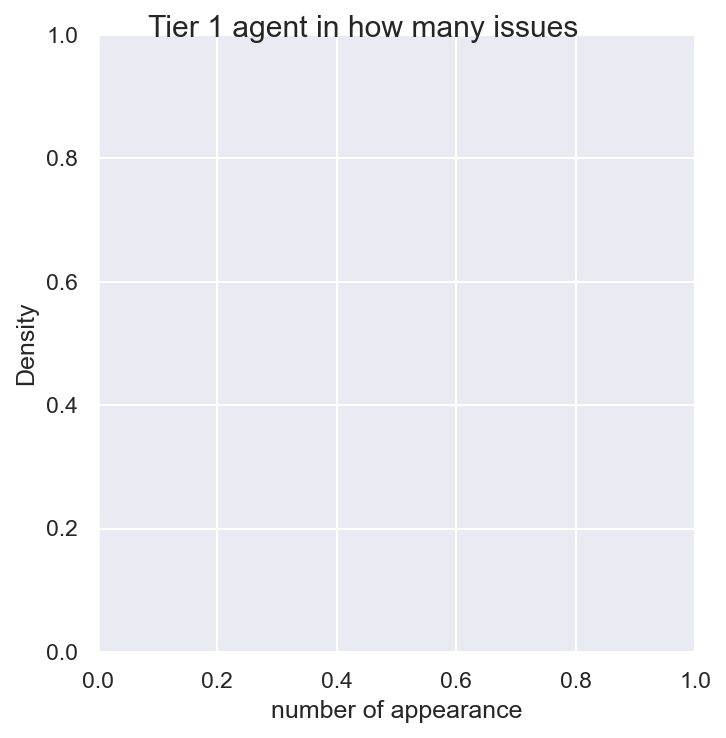

In [112]:
df = pd.DataFrame.from_dict(dic, orient='index', columns = [ 'number of appearance'])
df                                                                                        
                                                                                          
import matplotlib.pyplot as plt
import seaborn as sns, numpy as np
plt.rcParams['figure.dpi'] = 150
plt.rcParams['savefig.dpi'] = 200
sns.set(rc={'figure.figsize':(10,10)})
sns.displot(df['number of appearance'], color = 'red', kind="kde")
import pylab as pl
# df['number of appearance'].hist(color = 'r')
pl.suptitle("Tier 1 agent in how many issues")

                                                                                                                                                                                    

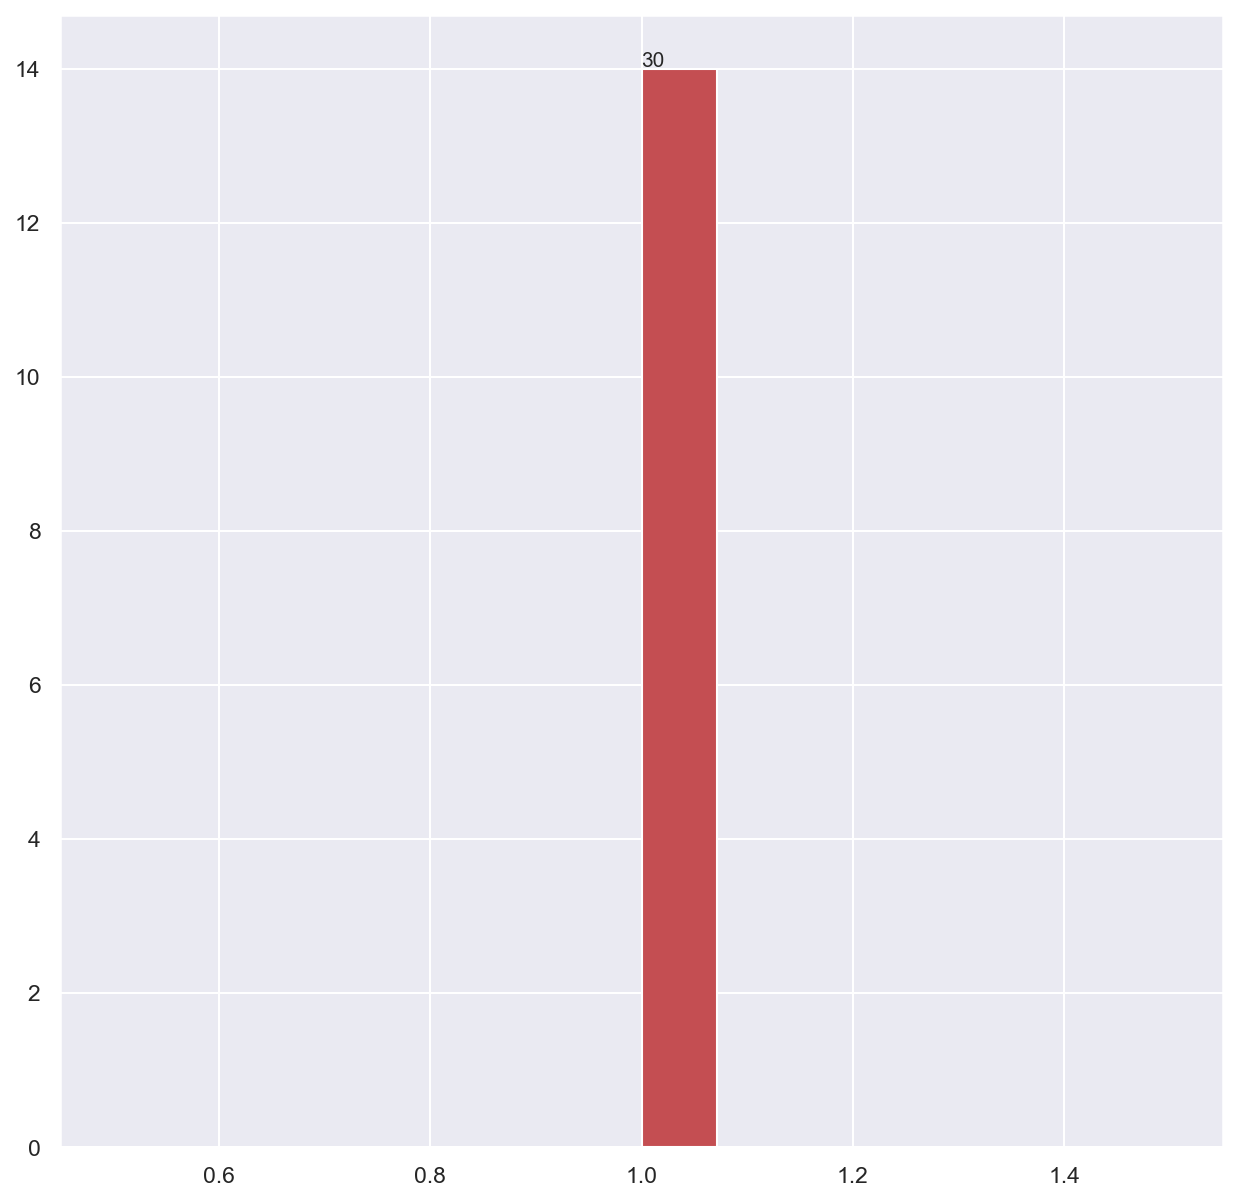

In [113]:
import numpy as np
import matplotlib.pyplot as plt


density, bins, _ = plt.hist(df['number of appearance'], density=True, bins=14, color = 'r')
count, _ = np.histogram(df['number of appearance'], bins)
for x,y,num in zip(bins, density, count):
    if num != 0:
        plt.text(x, y+0.02, num, fontsize=10, rotation=0) # x,y,str

In [114]:
len(dic)

30

In [115]:
# check different agents are good at handling what?
final_score.index = final_score.employee_name
final_score[list(final_score.columns)[3:]].T

employee_name              ABHILASH V KUMAR       ABHILASH V KUMAR  \
incidentlevel2reason  Able to locate charge  Change Adobe ID Email   
score                             24.466776              71.057464   
count                                     1                      7   

employee_name        ABHILASH V KUMAR            ABHILASH V KUMAR  \
incidentlevel2reason   Change Country  Change/Switch Subscription   
score                       75.510143                   80.904145   
count                               4                          41   

employee_name              ABHILASH V KUMAR    ABHILASH V KUMAR  \
incidentlevel2reason  Delete Payment Method  Duplicate Purchase   
score                             64.088924           46.556024   
count                                     2                   6   

employee_name                 ABHILASH V KUMAR      ABHILASH V KUMAR  \
incidentlevel2reason  Free credit days Request  Getting Started Help   
score                                90.139822             29.060667   
count                                        1                     1   

employee_name                                          ABHILASH V KUMAR  \
incidentlevel2reason  Getting from other source (work, school, compl...   
score                                                         68.245481   
count                                                                 2   

employee_name        ABHILASH V KUMAR  ...                vinay Malhotra  \
incidentlevel2reason  How to Download  ...  Password Reset Issue/Queries   
score                       74.881738  ...                     66.594201   
count                               1  ...                             1   

employee_name                                   vinay Malhotra vinay Malhotra  \
incidentlevel2reason  Purchased incorrect product (accidental)   Sign-in Loop   
score                                                80.042845      25.868802   
count                                                        1              1   

employee_name                            vinay Malhotra       vinay Malhotra  \
incidentlevel2reason  Spinning Wheel in Apps/Assets Tab  Storage Quota Issue   
score                                         27.363348            31.321004   
count                                                 1                    1   

employee_name                    vinay Malhotra    vinay Malhotra  \
incidentlevel2reason  Subscription Status Check  Unable to Launch   
score                                 31.896333         20.918001   
count                                         1                 1   

employee_name                       vinay Malhotra  \
incidentlevel2reason  Unable to Reach Adobe Server   
score                                    43.315008   
count                                            3   

employee_name                              vinay Malhotra  \
incidentlevel2reason  Unexpected Trial Mode/Buy now Error   
score                                            40.94827   
count                                                   4   

employee_name                 vinay Malhotra  
incidentlevel2reason  Workflow Related Query  
score                              56.158099  
count                                      3  

[3 rows x 111163 columns]

In [116]:
agent_check = final_score[list(final_score.columns)[3:]].T

In [117]:
# new_final_score = pd.merge(left =all_data_new[['employee_key', 'employee_name', 'sub_line_of_business__c']].drop_duplicates(),
#                        right = final_score, on = ['employee_name', 'sub_line_of_business__c'])

## other insights

In [118]:
# issue good at
df_all_data_new[df_all_data_new.incidentlevel2reason.isin(['Payment Delay/Update for Purchase Order', 'Free credit days Request', 
 'Images Licensed Accidentally', 'Unable to Change Plan Online' ,
 'Promo Plan/Pricing', 'Change/Switch Subscription', 'Change Billing Date' ,
 'CCP package creation', 'Adobe Update Server Setup Tool(AUSST)' ,
 'User Account Corruption', 'User Management API' 'Add a Contact', 
 'Activation Issues', 'Permission Issues while Importing' ,
 'Trial/Buy Now Error', 'Refer To Third Party' ,
 'Referred to Admin for Assignment', 'Metadata Import Issue' ,
 'Retrieve Serial Number', 
 'License not available – suggested to add new license', 'SSO Login Errors' ,
 'License Upgrade Entitlement(LUE) Upgrade', 'K12 Sign-in issue', 
 'Hardware Issue (Crash)' ,'Expired Card on File' ,'Error/Exit Code' ,
 'System Pricing Error', 'End of Subscription term', 
 'Device License Packaging', 'Third Party Device and Obsolete Drivers' ,
 'Change Of Reseller' ,'Lost/Stolen Card'])].csatscore.mean()

4.763717948717948

In [119]:
# issue bad at
df_all_data_new[df_all_data_new.incidentlevel2reason.isin(['No Watermark after Exporting', 'First Time Setup' ,'Transfer of License' ,
 'Adding/Removing Seat(s)', 'Remote Update Manager' ,
 'Redemption Code Not Marked As Sold' ,'License Expired Contact Reseller' ,
 'Case Closed by Customer', 'Market Segment Change (Indirect/Direct)', 
 'View Purchase History/Manage Account' ,'Entitlement Issues' ,
 'Plan not used/activated', 'Not sure', 'Data Loss' ,'Server Issue' ,
 'Crash During Import', 'Team Credit Pack Issues', 'Package Installation', 
 'File/Project Corruption' ,'Third Party Purchase Inquiry' ,
 'Corrupt Preferences' ,'Unable to locate charge', 'Recover Deleted Files' ,
 'Backend Request from Adobe Team' ,'Permissions Issue (Crash)' ,
 'Account Manager Inquiry', 'Lightroom Sync Issue', 'AFC', 'DM', 
 'Purchased incorrect product (accidental)' ,
 'Images Not Credited to Account', 'Unable to Rename Files and Add Preset' ,
 'Graphic Card Compatibility', 'Patent/Copyright Issues', 'SaaS Services' ,
 'Unauthorized/fraudulent/minor purchase', 'Technical Issues' ,
 'Output Quality Issue', 'Saas Subscription/Perpetual' ,
 'Payment Failure: Refer to Bank', 'Migrate Data', 'Add-on Issues' ,
 'Goodwill Gesture', 'Legacy/Free Products(Out Of Scope)' ,
 'Expired/Invalid Redemption Code', 'End Date Issue(Direct/Indirect Order)', 
 'Directory Creation', 'One Console Provisioning Issue' ,
 'Activate License not shown in Admin Console', 'Language Swap', 
 'Content Quality/Corrupt Images', 'SDL Download', 'Server Outage', 
 'Too complicated to learn', 'Correct Profile Issues' ,
 'License History/Usage Issues', 'Offline Activation', 
 'Fraudulent/Unauthorized Charge' ,
 'Crash while Exporting/Printing/Publishing/Scanning' ,
 'Workflow Related Crash' ,'Adobe Sign Provisioning Issue' ,
 'CC/DC File Sync\xa0Issue', 'On-demand or Standalone Refund' ,
 'Perpetual License Inquiry'])].count()/5247

employee_name                   21.914618
incidentlevel2reason            21.914618
sub_line_of_business__c         20.041738
wait_time                       21.914618
complete_duration               21.914618
avg_response_cust               21.914618
avg_response_agnt               21.914618
agent_handle_time               21.914618
close_time                      21.914618
no_of_upfront_sla_breach        21.914618
no_of_turns_per_conversation    21.914618
no_of_agents                    21.914618
agent_tenure_days               21.914618
resolution_days                 21.914618
customer_tenure_days             1.842958
csatscore                        2.879550
day_working_hours               21.914618
day_billable_hour               21.914618
CPH                             21.914618
pred_score                      21.914618
dtype: float64

In [120]:
#df_all_data_new[df_all_data_new.csatscore == 5][df_all_data_new.chs == 0].to_excel('reversed_csatascore_chs.xlsx')

In [121]:
df_all_data_new[df_all_data_new.incidentlevel2reason =='Activation Limit Reached'][df_all_data_new.employee_name =='Abhisheak Chatterjee']



/var/folders/qx/gfms0dt15dqbfn40x4pgrjr40000gn/T/ipykernel_86598/3704115692.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_all_data_new[df_all_data_new.incidentlevel2reason =='Activation Limit Reached'][df_all_data_new.employee_name =='Abhisheak Chatterjee']


employee_name      incidentlevel2reason  \
916411  Abhisheak Chatterjee  Activation Limit Reached   
916413  Abhisheak Chatterjee  Activation Limit Reached   
916415  Abhisheak Chatterjee  Activation Limit Reached   

       sub_line_of_business__c  wait_time  complete_duration  \
916411        Training/Nesting      4.357           1482.260   
916413        Training/Nesting     11.226           1152.893   
916415        Training/Nesting      3.845            833.537   

        avg_response_cust  avg_response_agnt  agent_handle_time  close_time  \
916411          81.926600          97.738333           1468.907       8.996   
916413          36.893833          55.376167           1139.134       2.533   
916415          76.348286          35.438333            825.894       3.798   

        no_of_upfront_sla_breach  no_of_turns_per_conversation  no_of_agents  \
916411                         0                            11             1   
916413                         0                            12             1   
916415                         0                            13             1   

        agent_tenure_days  resolution_days  customer_tenure_days  csatscore  \
916411                157                5                  -1.0        NaN   
916413                171                0                   NaN        NaN   
916415                143                0                   NaN        2.0   

        day_working_hours  day_billable_hour       CPH  pred_score  
916411               9.47               8.45  2.130045           0  
916413               9.47               8.45  2.130045           0  
916415               9.47               8.45  2.130045           1

In [122]:
'Aman Jain'

df_all_data_new[df_all_data_new.incidentlevel2reason =='Activation Limit Reached'][df_all_data_new.employee_name =='Aman Jain']


/var/folders/qx/gfms0dt15dqbfn40x4pgrjr40000gn/T/ipykernel_86598/3151455387.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_all_data_new[df_all_data_new.incidentlevel2reason =='Activation Limit Reached'][df_all_data_new.employee_name =='Aman Jain']


employee_name      incidentlevel2reason sub_line_of_business__c  \
1230930     Aman Jain  Activation Limit Reached          Consumer Photo   
1230931     Aman Jain  Activation Limit Reached          Consumer Photo   
1230932     Aman Jain  Activation Limit Reached          Consumer Photo   
1230933     Aman Jain  Activation Limit Reached          Consumer Photo   
1230934     Aman Jain  Activation Limit Reached          Consumer Photo   
1230935     Aman Jain  Activation Limit Reached          Consumer Photo   
1230937     Aman Jain  Activation Limit Reached          Consumer Photo   
1230938     Aman Jain  Activation Limit Reached          Consumer Photo   
1230939     Aman Jain  Activation Limit Reached          Consumer Photo   
1230940     Aman Jain  Activation Limit Reached          Consumer Photo   
1230942     Aman Jain  Activation Limit Reached          Consumer Photo   
1230943     Aman Jain  Activation Limit Reached          Consumer Photo   
1230945     Aman Jain  Activation Limit Reached          Consumer Photo   
1230946     Aman Jain  Activation Limit Reached          Consumer Photo   
1230947     Aman Jain  Activation Limit Reached          Consumer Photo   
1230948     Aman Jain  Activation Limit Reached          Consumer Photo   
1230949     Aman Jain  Activation Limit Reached                 Install   
1230951     Aman Jain  Activation Limit Reached          Consumer Photo   
1230952     Aman Jain  Activation Limit Reached          Consumer Photo   
1230953     Aman Jain  Activation Limit Reached          Consumer Photo   
1230954     Aman Jain  Activation Limit Reached          Consumer Photo   
1230955     Aman Jain  Activation Limit Reached          Consumer Photo   
1230957     Aman Jain  Activation Limit Reached          Consumer Photo   
1230959     Aman Jain  Activation Limit Reached                 Install   
1230960     Aman Jain  Activation Limit Reached          Consumer Photo   
1230961     Aman Jain  Activation Limit Reached                 Install   
1230962     Aman Jain  Activation Limit Reached          Consumer Photo   
1230963     Aman Jain  Activation Limit Reached          Consumer Photo   
1230964     Aman Jain  Activation Limit Reached                 Install   
1230965     Aman Jain  Activation Limit Reached          Consumer Photo   
1230966     Aman Jain  Activation Limit Reached                 Install   
1230969     Aman Jain  Activation Limit Reached          Consumer Photo   
1230970     Aman Jain  Activation Limit Reached                 Install   
1230971     Aman Jain  Activation Limit Reached                 Install   
1230972     Aman Jain  Activation Limit Reached                 Install   
1230973     Aman Jain  Activation Limit Reached          Consumer Photo   

         wait_time  complete_duration  avg_response_cust  avg_response_agnt  \
1230930    188.372           1251.306          19.332100          46.136833   
1230931      3.733           4149.461          75.136667          93.997000   
1230932      4.663            710.440          24.845250          14.008333   
1230933      3.877            876.014          24.782000          20.717231   
1230934      6.018            596.177          12.248222          29.655000   
1230935      4.584            669.267          24.698800          20.853857   
1230937    712.529           3745.077          36.240222          59.888818   
1230938      4.347            571.810          46.330667          35.277143   
1230939      3.450            788.540          36.791714          20.597111   
1230940      6.007            795.707          22.212800          21.475636   
1230942      6.380            997.245          19.376250          16.596600   
1230943      4.655            516.902          30.619750          25.291667   
1230945      5.436            936.101          47.278100          34.470182   
1230946     44.478           2020.517          65.877000          72.345091   
1230947      6.396           1117.776          

In [123]:
df_all_data_new[df_all_data_new.employee_name =='Abhisheak Chatterjee'][df_all_data_new.incidentlevel2reason =='Unexpected Trial Mode/Buy now Error']



/var/folders/qx/gfms0dt15dqbfn40x4pgrjr40000gn/T/ipykernel_86598/4149743214.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_all_data_new[df_all_data_new.employee_name =='Abhisheak Chatterjee'][df_all_data_new.incidentlevel2reason =='Unexpected Trial Mode/Buy now Error']


employee_name                 incidentlevel2reason  \
916318  Abhisheak Chatterjee  Unexpected Trial Mode/Buy now Error   
916319  Abhisheak Chatterjee  Unexpected Trial Mode/Buy now Error   
916321  Abhisheak Chatterjee  Unexpected Trial Mode/Buy now Error   
916325  Abhisheak Chatterjee  Unexpected Trial Mode/Buy now Error   

       sub_line_of_business__c  wait_time  complete_duration  \
916318           NoEntitlement      2.656           2049.479   
916319           NoEntitlement      5.028           2490.649   
916321                     NaN      3.551           3744.179   
916325           NoEntitlement      4.127           1990.426   

        avg_response_cust  avg_response_agnt  agent_handle_time  close_time  \
916318         140.699333          54.476333           256.7632    1421.499   
916319          47.651300          34.401250           896.3480    1589.273   
916321         216.567600          34.104500           659.6384    2175.010   
916325          60.973125          24.176800           429.3129    1249.997   

        no_of_upfront_sla_breach  no_of_turns_per_conversation  no_of_agents  \
916318                         0                             6             1   
916319                         0                            22             2   
916321                         0                            11             2   
916325                         0                            18             2   

        agent_tenure_days  resolution_days  customer_tenure_days  csatscore  \
916318                290                5                   NaN        NaN   
916319                251                0                   NaN        NaN   
916321                 28                0                   NaN        NaN   
916325                280                6                   NaN        NaN   

        day_working_hours  day_billable_hour       CPH  pred_score  
916318               9.47               8.45  2.130045           0  
916319               9.47               8.45  2.130045           1  
916321               9.47               8.45  2.130045           1  
916325               9.47               8.45  2.130045           0

## check if the second agent is in our scorecard or not?

In [124]:
# check if the second agent is in our scorecard or not?

all_data_new.columns

Index(['Unnamed: 0', 'employee_key', 'employee_name', 'agent_path',
       'skill_category', 'first_queue', 'last_queue', 'workday_id',
       'bot_involved_flag', 'case_key', 'incidentlevel2reason',
       'sub_line_of_business__c', 'wait_time', 'complete_duration',
       'avg_response_cust', 'avg_response_agnt', 'agent_handle_time',
       'close_time', 'no_of_upfront_sla_breach',
       'no_of_turns_per_conversation', 'no_of_agents', 'agent_tenure_days',
       'resolution_days', 'customer_tenure_days', 'csatscore', 'cesscore',
       'agentsatisfactionscore', 'fcrscore', 'fiscal_qtr', 'new_employee_key',
       'pred_score', 'model_prob', 'counting', 'day_working_hours',
       'day_billable_hour', 'CPH', 'number_cases', 'chs'],
      dtype='object')

In [125]:
all_data_new[all_data_new.no_of_agents == 2][all_data_new.case_key == 'ADB-14507969-L4H9']


/var/folders/qx/gfms0dt15dqbfn40x4pgrjr40000gn/T/ipykernel_86598/815134537.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  all_data_new[all_data_new.no_of_agents == 2][all_data_new.case_key == 'ADB-14507969-L4H9']


Unnamed: 0                                       employee_key  \
1808142     1808142  19909F70-03F9-EB11-94EF-00224803BE0D||DYNAMIC_...   

        employee_name        agent_path skill_category     first_queue  \
1808142      Girish A  UNKNOWN->UNKNOWN             TS  CCI-Eng-CS-Msg   

               last_queue  workday_id  bot_involved_flag           case_key  \
1808142  TS-Eng-Photo-Msg         NaN                  3  ADB-14507969-L4H9   

         ... fiscal_qtr                                   new_employee_key  \
1808142  ...    2021-Q4  19909F70-03F9-EB11-94EF-00224803BE0D||DYNAMIC_CRM   

         pred_score  model_prob  counting  day_working_hours  \
1808142           0      0.0638       122               9.41   

         day_billable_hour       CPH  number_cases  chs  
1808142               8.41  1.281987          1145    0  

[1 rows x 38 columns]

In [126]:
all_data_new.shape

(2791629, 38)

In [127]:
all_data_new[all_data_new.employee_key=='19D201C9-ABFE-EA11-A815-000D3A31CF04||DYNAMIC_CRM||2021-07-21']

Unnamed: 0                                       employee_key  \
281979      281979  19D201C9-ABFE-EA11-A815-000D3A31CF04||DYNAMIC_...   
281980      281980  19D201C9-ABFE-EA11-A815-000D3A31CF04||DYNAMIC_...   
281982      281982  19D201C9-ABFE-EA11-A815-000D3A31CF04||DYNAMIC_...   
281983      281983  19D201C9-ABFE-EA11-A815-000D3A31CF04||DYNAMIC_...   
281984      281984  19D201C9-ABFE-EA11-A815-000D3A31CF04||DYNAMIC_...   
281985      281985  19D201C9-ABFE-EA11-A815-000D3A31CF04||DYNAMIC_...   
281986      281986  19D201C9-ABFE-EA11-A815-000D3A31CF04||DYNAMIC_...   
281988      281988  19D201C9-ABFE-EA11-A815-000D3A31CF04||DYNAMIC_...   
281989      281989  19D201C9-ABFE-EA11-A815-000D3A31CF04||DYNAMIC_...   
281990      281990  19D201C9-ABFE-EA11-A815-000D3A31CF04||DYNAMIC_...   
281991      281991  19D201C9-ABFE-EA11-A815-000D3A31CF04||DYNAMIC_...   
281992      281992  19D201C9-ABFE-EA11-A815-000D3A31CF04||DYNAMIC_...   
281993      281993  19D201C9-ABFE-EA11-A815-000D3A31CF04||DYNAMIC_...   
281994      281994  19D201C9-ABFE-EA11-A815-000D3A31CF04||DYNAMIC_...   
281995      281995  19D201C9-ABFE-EA11-A815-000D3A31CF04||DYNAMIC_...   
281996      281996  19D201C9-ABFE-EA11-A815-000D3A31CF04||DYNAMIC_...   
281998      281998  19D201C9-ABFE-EA11-A815-000D3A31CF04||DYNAMIC_...   
281999      281999  19D201C9-ABFE-EA11-A815-000D3A31CF04||DYNAMIC_...   
282000      282000  19D201C9-ABFE-EA11-A815-000D3A31CF04||DYNAMIC_...   
282001      282001  19D201C9-ABFE-EA11-A815-000D3A31CF04||DYNAMIC_...   
282002      282002  19D201C9-ABFE-EA11-A815-000D3A31CF04||DYNAMIC_...   
282004      282004  19D201C9-ABFE-EA11-A815-000D3A31CF04||DYNAMIC_...   
282005      282005  19D201C9-ABFE-EA11-A815-000D3A31CF04||DYNAMIC_...   
282008      282008  19D201C9-ABFE-EA11-A815-000D3A31CF04||DYNAMIC_...   
282011      282011  19D201C9-ABFE-EA11-A815-000D3A31CF04||DYNAMIC_...   
282012      282012  19D201C9-ABFE-EA11-A815-000D3A31CF04||DYNAMIC_...   
282013      282013  19D201C9-ABFE-EA11-A815-000D3A31CF04||DYNAMIC_...   
282014      282014  19D201C9-ABFE-EA11-A815-000D3A31CF04||DYNAMIC_...   
282015      282015  19D201C9-ABFE-EA11-A815-000D3A31CF04||DYNAMIC_...   
282016      282016  19D201C9-ABFE-EA11-A815-000D3A31CF04||DYNAMIC_...   
282017      282017  19D201C9-ABFE-EA11-A815-000D3A31CF04||DYNAMIC_...   
282018      282018  19D201C9-ABFE-EA11-A815-000D3A31CF04||DYNAMIC_...   
282019      282019  19D201C9-ABFE-EA11-A815-000D3A31CF04||DYNAMIC_...   
282020      282020  19D201C9-ABFE-EA11-A815-000D3A31CF04||DYNAMIC_...   
282021      282021  19D201C9-ABFE-EA11-A815-000D3A31CF04||DYNAMIC_...   
282022      282022  19D201C9-ABFE-EA11-A815-000D3A31CF04||DYNAMIC_...   
282023      282023  19D201C9-ABFE-EA11-A815-000D3A31CF04||DYNAMIC_...   
282024      282024  19D201C9-ABFE-EA11-A815-000D3A31CF04||DYNAMIC_...   
282027      282027  19D201C9-ABFE-EA11-A815-000D3A31CF04||DYNAMIC_...   
282029      282029  19D201C9-ABFE-EA11-A815-000D3A31CF04||DYNAMIC_...   
282030      282030  19D201C9-ABFE-EA11-A815-000D3A31CF04||DYNAMIC_...   
282031      282031  19D201C9-ABFE-EA11-A815-000D3A31CF04||DYNAMIC_...   
282034      282034  19D201C9-ABFE-EA11-A815-000D3A31CF04||DYNAMIC_...   
282035      282035  19D201C9-ABFE-EA11-A815-000D3A31CF04||DYNAMIC_...   
282039      282039  19D201C9-ABFE-EA11-A815-000D3A31CF04||DYNAMIC_...   
282041      282041  19D201C9-ABFE-EA11-A815-000D3A31CF04||DYNAMIC_...   
282042      282042  19D201C9-ABFE-EA11-A815-000D3A31CF04||DYNAMIC_...   
282043      282043  19D201C9-ABFE-EA11-A815-000D3A31CF04||DYNAMIC_...   
282044      282044  19D201C9-ABFE-EA11-A815-000D3A31CF04||DYNAMIC_...   
282047      282047  19D201C9-ABFE-EA11-A815-000D3A31CF04||DYNAMIC_...   
282048      282048  19D201C9-ABFE-EA11-A815-000D3A31CF04||DYNAMIC_...   
282049      282049  19D201C9-ABFE-EA11-A815-000D3A31CF04||DYNAMIC_...   
282050      282050  19D201C9-ABFE-EA11-A815-000D3A31CF04||DYNAMIC_...   
282051      282051  19D201C9-ABFE-EA11-A815-000D3A31CF04||DYNAMIC_

In [128]:
#all_data_new

In [129]:
all_data_new[all_data_new.incidentlevel2reason == 'Subscription Status Check'][all_data_new.no_of_agents == 4][all_data_new.pred_score == 1]


/var/folders/qx/gfms0dt15dqbfn40x4pgrjr40000gn/T/ipykernel_86598/2546705798.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  all_data_new[all_data_new.incidentlevel2reason == 'Subscription Status Check'][all_data_new.no_of_agents == 4][all_data_new.pred_score == 1]


Unnamed: 0                                       employee_key  \
398             398  2B0DF55E-191A-EC11-B6E6-000D3A304A3D||DYNAMIC_...   
418             418  2B0DF55E-191A-EC11-B6E6-000D3A304A3D||DYNAMIC_...   
921             921  A74C24AB-5856-EB11-BB23-000D3A31C6E9||DYNAMIC_...   
1160           1160  A74C24AB-5856-EB11-BB23-000D3A31C6E9||DYNAMIC_...   
1510           1510  A74C24AB-5856-EB11-BB23-000D3A31C6E9||DYNAMIC_...   
1854           1854  A74C24AB-5856-EB11-BB23-000D3A31C6E9||DYNAMIC_...   
2234           2234  A74C24AB-5856-EB11-BB23-000D3A31C6E9||DYNAMIC_...   
2398           2398  A74C24AB-5856-EB11-BB23-000D3A31C6E9||DYNAMIC_...   
13285         13285  7F0CBEBF-1C87-E911-A864-000D3A372A3A||DYNAMIC_...   
13490         13490  7F0CBEBF-1C87-E911-A864-000D3A372A3A||DYNAMIC_...   
13650         13650  7F0CBEBF-1C87-E911-A864-000D3A372A3A||DYNAMIC_...   
13725         13725  7F0CBEBF-1C87-E911-A864-000D3A372A3A||DYNAMIC_...   
20622         20622  ACD5CD3A-FD33-EA11-A812-000D3A31C841||DYNAMIC_...   
20694         20694  ACD5CD3A-FD33-EA11-A812-000D3A31C841||DYNAMIC_...   
20870         20870  ACD5CD3A-FD33-EA11-A812-000D3A31C841||DYNAMIC_...   
21003         21003  ACD5CD3A-FD33-EA11-A812-000D3A31C841||DYNAMIC_...   
28041         28041  62530466-F933-EA11-A812-000D3A31C6E9||DYNAMIC_...   
28173         28173  62530466-F933-EA11-A812-000D3A31C6E9||DYNAMIC_...   
32795         32795  E5A209B7-6F3C-E911-A85B-000D3A37285E||DYNAMIC_...   
32910         32910  E5A209B7-6F3C-E911-A85B-000D3A37285E||DYNAMIC_...   
32947         32947  E5A209B7-6F3C-E911-A85B-000D3A37285E||DYNAMIC_...   
37265         37265  98DA521E-1A37-EA11-A813-000D3A31C4C1||DYNAMIC_...   
41524         41524  D40BA4C9-FC7F-EA11-A811-000D3A31C911||DYNAMIC_...   
44221         44221  F92A6F55-B61A-EA11-A813-000D3A31C4C1||DYNAMIC_...   
51283         51283  CA70CEEF-93E1-E911-A875-000D3A372A3A||DYNAMIC_...   
51358         51358  CA70CEEF-93E1-E911-A875-000D3A372A3A||DYNAMIC_...   
51410         51410  CA70CEEF-93E1-E911-A875-000D3A372A3A||DYNAMIC_...   
61051         61051  CCBA75E5-E02F-EB11-A813-000D3A31C911||DYNAMIC_...   
61055         61055  CCBA75E5-E02F-EB11-A813-000D3A31C911||DYNAMIC_...   
61103         61103  CCBA75E5-E02F-EB11-A813-000D3A31C911||DYNAMIC_...   
61109         61109  CCBA75E5-E02F-EB11-A813-000D3A31C911||DYNAMIC_...   
61113         61113  CCBA75E5-E02F-EB11-A813-000D3A31C911||DYNAMIC_...   
61130         61130  CCBA75E5-E02F-EB11-A813-000D3A31C911||DYNAMIC_...   
61248         61248  CCBA75E5-E02F-EB11-A813-000D3A31C911||DYNAMIC_...   
61251         61251  CCBA75E5-E02F-EB11-A813-000D3A31C911||DYNAMIC_...   
61288         61288  CCBA75E5-E02F-EB11-A813-000D3A31C911||DYNAMIC_...   
61299         61299  CCBA75E5-E02F-EB11-A813-000D3A31C911||DYNAMIC_...   
61301         61301  CCBA75E5-E02F-EB11-A813-000D3A31C911||DYNAMIC_...   
61445         61445  CCBA75E5-E02F-EB11-A813-000D3A31C911||DYNAMIC_...   
61695         61695  CCBA75E5-E02F-EB11-A813-000D3A31C911||DYNAMIC_...   
61951         61951  CCBA75E5-E02F-EB11-A813-000D3A31C911||DYNAMIC_...   
62060         62060  CCBA75E5-E02F-EB11-A813-000D3A31C911||DYNAMIC_...   
62317         62317  CCBA75E5-E02F-EB11-A813-000D3A31C911||DYNAMIC_...   
62346         62346  CCBA75E5-E02F-EB11-A813-000D3A31C911||DYNAMIC_...   
62368         62368  CCBA75E5-E02F-EB11-A813-000D3A31C911||DYNAMIC_...   
62546         62546  CCBA75E5-E02F-EB11-A813-000D3A31C911||DYNAMIC_...   
66849         66849  E52AE23C-BE30-EA11-A812-000D3A31C841||DYNAMIC_...   
66923         66923  E52AE23C-BE30-EA11-A812-000D3A31C841||DYNAMIC_...   
66961         66961  E52AE23C-BE30-EA11-A812-000D3A31C841||DYNAMIC_...   
67052         67052  E52AE23C-BE30-EA11-A812-000D3A31C841||DYNAMIC_...   
67077         67077  E52AE23C-BE30-EA11-A812-000D3A31C841||DYNAMIC_...   
67104         67104  E52AE23C-BE30-EA11-A812-000D3A31C841||DYNAMIC_...   
67244         67244  E52AE23C-BE30-EA11-A812-000D3A31C841||DYNAMIC_...   
67245        

In [130]:
#X[X.employee_key=='3D691F46-A0A7-EB11-B1AC-000D3A5CD190||DYNAMIC_CRM||2021-08-11'][X.incidentlevel2reason == 'Billing Failure/Error']


In [131]:
#X[X.employee_key=='CEAD8079-6D20-EB11-A813-000D3A31C911||DYNAMIC_CRM||2021-09-07'][X.incidentlevel2reason == 'Billing Failure/Error'].to_excel('presentation.xlsx')


In [132]:
## feature importance
score_detail = pd.read_excel('score_detail.xlsx')

In [133]:
score_detail

Unnamed: 0                      Variable  Bin id  \
0             0                 employee_name       0   
1             1                 employee_name       1   
2             2                 employee_name       2   
3             3                 employee_name       3   
4             4                 employee_name       4   
5             5                 employee_name       5   
6             6                 employee_name       6   
7             7                 employee_name       7   
8             8                 employee_name       8   
9             9                 employee_name       9   
10           10                 employee_name      10   
11           11                 employee_name      11   
12           12                 employee_name      12   
13           13                 employee_name      13   
14           14                 employee_name      14   
15           15                 employee_name      15   
16            0          incidentlevel2reason       0   
17            1          incidentlevel2reason       1   
18            2          incidentlevel2reason       2   
19            3          incidentlevel2reason       3   
20            4          incidentlevel2reason       4   
21            5          incidentlevel2reason       5   
22            6          incidentlevel2reason       6   
23            7          incidentlevel2reason       7   
24            8          incidentlevel2reason       8   
25            9          incidentlevel2reason       9   
26           10          incidentlevel2reason      10   
27           11          incidentlevel2reason      11   
28           12          incidentlevel2reason      12   
29           13          incidentlevel2reason      13   
30           14          incidentlevel2reason      14   
31            0       sub_line_of_business__c       0   
32            1       sub_line_of_business__c       1   
33            2       sub_line_of_business__c       2   
34            3       sub_line_of_business__c       3   
35            4       sub_line_of_business__c       4   
36            5       sub_line_of_business__c       5   
37            6       sub_line_of_business__c       6   
38            7       sub_line_of_business__c       7   
39            8       sub_line_of_business__c       8   
40            9       sub_line_of_business__c       9   
41           10       sub_line_of_business__c      10   
42            0                     wait_time       0   
43            1                     wait_time       1   
44            2                     wait_time       2   
45            3                     wait_time       3   
46            4                     wait_time       4   
47            5                     wait_time       5   
48            6                     wait_time       6   
49            7                     wait_time       7   
50            8                     wait_time       8   
51            9                     wait_time       9   
52           10                     wait_time      10   
53           11                     wait_time      11   
54           12                     wait_time      12   
55           13                     wait_time      13   
56           14                     wait_time      14   
57            0             complete_duration       0   
58            1             complete_duration       1   
59            2             complete_duration       2   
60            3             complete_duration       3   
61            4             complete_duration       4   
62            5             complete_duration       5   
63            6             complete_duration       6   
64            7             complete_duration       7   
65            8             complete_duration       8   
66            9             complete_duration       9   
67           10             complete_duration      10   
68           11             complete_duration      11   
69           12

## feature importance

In [134]:
feature_importance = pd.DataFrame(score_detail.groupby('Variable').Coefficient.apply(lambda x: abs(x.mean()))).reset_index()
feature_importance = feature_importance.sort_values('Coefficient')
#check if the sorting indices are correct


In [135]:
feature_importance.Coefficient = 100.0 * (feature_importance.Coefficient / feature_importance.Coefficient.max())
feature_importance = feature_importance.sort_values('Coefficient')
feature_importance

Variable   Coefficient
15      no_of_upfront_sla_breach  4.204865e-16
6              complete_duration  3.280417e+00
18                     wait_time  4.807722e+00
9              day_billable_hour  6.028249e+00
4              avg_response_cust  7.050580e+00
3              avg_response_agnt  7.117815e+00
2              agent_tenure_days  8.813248e+00
17       sub_line_of_business__c  1.188733e+01
14  no_of_turns_per_conversation  1.319313e+01
13                  no_of_agents  1.385175e+01
1              agent_handle_time  1.908741e+01
11                 employee_name  2.134539e+01
5                     close_time  2.396810e+01
7                      csatscore  2.865589e+01
10             day_working_hours  3.012625e+01
12          incidentlevel2reason  3.287633e+01
16               resolution_days  4.254214e+01
0                            CPH  5.274096e+01
8           customer_tenure_days  1.000000e+02

In [136]:
# import matplotlib.pyplot as plt

In [137]:

# pos = np.arange(18) + .5

# featfig = plt.figure(figsize=(8, 6), dpi=180)
# featax = featfig.add_subplot(1, 1, 1)
# featax.barh(pos, feature_importance.Coefficient, align='center', color = 'red')
# featax.set_yticks(pos)
# featax.set_yticklabels(np.array(feature_importance.Variable), fontsize=8)
# featax.set_xlabel('Relative Feature Importance')

# plt.tight_layout()   
# plt.show()

## some ab testing

In [138]:
final_score = final_score.iloc[:,3:]

In [139]:
#pd.DataFrame(final_score[final_score.index == '0018A03B-FF88-EB11-B1AE-000D3A31C841||DYNAMIC_CRM||2021-06-11'].iloc[0].sort_values(ascending = False)[:10])



In [140]:
#len(final_score[final_score['Change/Switch Subscription'] >= 55.498470])

In [141]:
# dic = {}
# for i in range(len(pd.DataFrame(final_score[final_score.index == '0018A03B-FF88-EB11-B1AE-000D3A31C841||DYNAMIC_CRM||2021-04-23'].iloc[0].sort_values(ascending = False)[:10]))):
    
#     df = pd.DataFrame(final_score[final_score.index == '0018A03B-FF88-EB11-B1AE-000D3A31C841||DYNAMIC_CRM||2021-04-23'].iloc[0].sort_values(ascending = False)[:10])
    
    
#     len(final_score[final_score[df.index[i]] >= df.iloc[i, 0]])
#     dic[df.index[i]] = round(len(final_score[final_score[df.index[i]] >= df.iloc[i, 0]])/7890, 3)
    





In [142]:
#dic

In [143]:
#pd.DataFrame(dic.items(), columns=['issue', 'percentile']).sort_values('percentile').T

In [144]:
# ab testing on different tier group
import pandas as pd
all_data_new = pd.read_csv('demo.csv')

In [145]:
#all_data_new

In [146]:
final_score = pd.read_excel('agent_scorecard_performance_2021.xlsx')  # merge a new table

In [147]:
final_score.head()

Unnamed: 0     employee_name    sub_line_of_business__c  \
0           0  ABHILASH V KUMAR  Consumer Customer Service   
1           1  ABHILASH V KUMAR  Consumer Customer Service   
2           2  ABHILASH V KUMAR  Consumer Customer Service   
3           3  ABHILASH V KUMAR  Consumer Customer Service   
4           4  ABHILASH V KUMAR  Consumer Customer Service   

         incidentlevel2reason      score  count  
0       Able to locate charge  24.466776      1  
1       Change Adobe ID Email  71.057464      7  
2              Change Country  75.510143      4  
3  Change/Switch Subscription  80.904145     41  
4       Delete Payment Method  64.088924      2

In [148]:
final_score.shape
final_score = pd.merge(left = final_score, right = all_data_new[['employee_name']].drop_duplicates(), on =['employee_name'], how = 'left')

final_score.shape  # 217317
employee_count = pd.DataFrame(all_data_new.groupby(['employee_name', 'incidentlevel2reason']).case_key.count()).reset_index()
employee_count = employee_count.rename(columns = {'case_key':'count_number'})

final_score = pd.merge(left = final_score, right = employee_count.drop_duplicates(), on =['employee_name', 'incidentlevel2reason'], how = 'left')




In [149]:
final_score.columns

Index(['Unnamed: 0', 'employee_name', 'sub_line_of_business__c',
       'incidentlevel2reason', 'score', 'count', 'count_number'],
      dtype='object')

In [150]:
# new_final_score = pd.DataFrame(final_score.groupby(['employee_name', 'incidentlevel2reason']).agg({'score': 'mean', 'count_number':'sum'})).reset_index()

# new_final_score = pd.merge(left = new_final_score, right = final_score[['employee_name', 'sub_line_of_business__c']].drop_duplicates(), how = 'left')



In [151]:

incidentlevel2reason = final_score.incidentlevel2reason.unique()
tier_1_employee = final_score[final_score.incidentlevel2reason == 'Subscription Status Check'][final_score.sub_line_of_business__c != 'Leadership'][final_score.count_number > 5].sort_values('score', ascending = False)[['employee_name']].iloc[:10]
tier_1 = pd.merge(left = tier_1_employee, right = all_data_new, on='employee_name', how = 'left')

other_group = df_diff = pd.concat([tier_1,all_data_new]).drop_duplicates(keep=False)


/var/folders/qx/gfms0dt15dqbfn40x4pgrjr40000gn/T/ipykernel_86598/1202470282.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tier_1_employee = final_score[final_score.incidentlevel2reason == 'Subscription Status Check'][final_score.sub_line_of_business__c != 'Leadership'][final_score.count_number > 5].sort_values('score', ascending = False)[['employee_name']].iloc[:10]


In [152]:
from scipy.stats import ttest_ind
import scipy.stats as stats


ab_test_list = [
         'avg_response_agnt',
       'agent_handle_time', 
       'no_of_turns_per_conversation', 'no_of_agents', 'agent_tenure_days',
       'resolution_days',  'csatscore', 
    'CPH']

for check_attribute in ab_test_list:

    print ("======"+ check_attribute + " mean and ab test===========")
    print (tier_1[check_attribute].dropna().mean(), other_group[check_attribute].dropna().mean())
    print (ttest_ind(
        tier_1[check_attribute].dropna(), 
        other_group[check_attribute].dropna(),equal_var=True
    ) )


======avg_response_agnt mean and ab test===========
44.98645941027165 56.346090297299796
Ttest_indResult(statistic=-10.505390172844717, pvalue=8.167536281150741e-26)
======agent_handle_time mean and ab test===========
1601.411210484035 1465.6494863198757
Ttest_indResult(statistic=7.191666279576928, pvalue=6.402124321858138e-13)
======no_of_turns_per_conversation mean and ab test===========
23.87826982492276 20.757864828651336
Ttest_indResult(statistic=16.154756940030015, pvalue=1.0578023372240417e-58)
======no_of_agents mean and ab test===========
2.1705458290422244 1.9750202205130376
Ttest_indResult(statistic=18.733107958478442, pvalue=2.6889411555423837e-78)
======agent_tenure_days mean and ab test===========
168.79526261585994 596.9801749262767
Ttest_indResult(statistic=-44.45402653480139, pvalue=0.0)
======resolution_days mean and ab test===========
2.4797116374871266 2.569413235518919
Ttest_indResult(statistic=-0.781844819248325, pvalue=0.4343058438219003)
======csatscore mean and

In [153]:
employee_count = pd.DataFrame(all_data_new.groupby(['employee_name', 'incidentlevel2reason']).case_key.count()).reset_index()

employee_count = employee_count.rename(columns = {'case_key':'count_number'})


In [154]:
final_score = pd.merge(left = final_score, right = employee_count.drop_duplicates(), on =['employee_name', 'incidentlevel2reason'], how = 'left')


In [155]:
final_score.head()

Unnamed: 0     employee_name    sub_line_of_business__c  \
0           0  ABHILASH V KUMAR  Consumer Customer Service   
1           1  ABHILASH V KUMAR  Consumer Customer Service   
2           2  ABHILASH V KUMAR  Consumer Customer Service   
3           3  ABHILASH V KUMAR  Consumer Customer Service   
4           4  ABHILASH V KUMAR  Consumer Customer Service   

         incidentlevel2reason      score  count  count_number_x  \
0       Able to locate charge  24.466776      1               1   
1       Change Adobe ID Email  71.057464      7               9   
2              Change Country  75.510143      4               5   
3  Change/Switch Subscription  80.904145     41              51   
4       Delete Payment Method  64.088924      2               2   

   count_number_y  
0               1  
1               9  
2               5  
3              51  
4               2